# <center> Практика. Статистические тесты в контексте EDA

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

В процессе своего анализа вы должны:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
- А также ответить на ключевые вопросы HR-агентства:
    - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
    - Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

1) тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
2) тест для категориальных признаков.

Данные содержат следующие столбцы:
* work_year	Год, в котором была выплачена зарплата.
* experience_level	Опыт работы на этой должности в течение года со следующими возможными значениями:
    * EN — Entry-level/Junior;
    * MI — Mid-level/Intermediate;
    * SE — Senior-level/Expert;
    * EX — Executive-level/Director.
* employment_type	Тип трудоустройства для этой роли:
    * PT — неполный рабочий день;
    * FT — полный рабочий день;
    * CT — контракт;
    * FL — фриланс.
* job_title	Роль, в которой соискатель работал в течение года.
* salary	Общая выплаченная валовая сумма заработной платы.
* salary_currency	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
* salary_in_usd	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
* employee_residence	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
* remote_ratio	Общий объём работы, выполняемой удалённо. Возможные значения:
    * 0 — удалённой работы нет (менее 20 %);
    * 50 — частично удалённая работа;
    * 100 — полностью удалённая работа (более 80 %).
* company_location	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
* company_size	Среднее количество людей, работавших в компании в течение года:
    * S — менее 50 сотрудников (небольшая компания);
    * M — от 50 до 250 сотрудников (средняя компания);
    * L — более 250 сотрудников (крупная компания).

## Загрузка данных

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns
ds=pd.read_csv("C:\SkillFactory\учебный материал\data\ds_salaries.csv")

display(ds)


<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
C:\Users\govor\AppData\Local\Temp\ipykernel_15844\163310559.py:11: SyntaxWarning: invalid escape sequence '\S'
  ds=pd.read_csv("C:\SkillFactory\учебный материал\data\ds_salaries.csv")


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Описательный анализ данных

In [3]:
# Проверяем на наличие пропусков
display(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

Проверим данные на наличие полных дубликатов:

In [4]:
# создаем список с названием колонок
dubl_colums=list(ds.columns)
dubl_colums.remove('Unnamed: 0')
# удаляем дубликаты указав в функцию drop_duplicates параметр subset и передали в него список с именами колонок
ds=ds.drop_duplicates(subset=dubl_colums)
ds=ds.drop('Unnamed: 0',axis=1)


Обнаружили и удалили 42 дубликата

In [5]:
# создаем пустой список неинформативных колонок
low_information_cools=[]
for cool in ds.columns:
    # наибольшая относительная частота в признаке
    top_freq=ds[cool].value_counts(normalize=True).max()
    # доля уникальных значений
    nuniqe_ratio=ds[cool].nunique()/ds[cool].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq>0.95:
        low_information_cools.append(cool)
        print(f'{cool}:{round(top_freq*100,2)} одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nuniqe_ratio>0.95:
        low_information_cools.append(cool)
        print(f'{cool}:{round(nuniqe_ratio*100,2)} уникальных значений')
# удаляем неинформативный признак
#ds=ds.drop(low_information_cools,axis=1)

employment_type:96.64 одинаковых значений


Надйем категориальные признаки

In [6]:
# создаем пустой список 
unique_list=[]
# проходимся циклом по признакам
for col in ds.columns:
    # создаем картедж название признака, число уникальных значений, тип
    item=(col, ds[col].nunique(),ds[col].dtypes)
    # добавляем кортедж в список
    unique_list.append(item)
# создаем вспомогательную таблицу и сортируем ее
unique_counts=pd.DataFrame(
    unique_list,
    columns=['Column_name','Num_Unique','Type']
).sort_values(by='Num_Unique', ignore_index=True)
display(unique_counts)
display(ds.info())

,Column_name,Num_Unique,Type
0,work_year,3,int64
1,remote_ratio,3,int64
2,company_size,3,object
3,experience_level,4,object
4,employment_type,4,object
5,salary_currency,17,object
6,job_title,50,object
7,company_location,50,object
8,employee_residence,57,object
9,salary,272,int64


<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


None

In [7]:
# преоразуем категориальные признаки исходя из таблицы
# задем максимально число уникальных категорий
max_unique_count=270
for col in ds.columns:
    if ds[col].nunique()<max_unique_count and col!='work_year':
        ds[col]=ds[col].astype('category')
display(ds.info())

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    int64   
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_title           565 non-null    category
 4   salary              565 non-null    int64   
 5   salary_currency     565 non-null    category
 6   salary_in_usd       565 non-null    int64   
 7   employee_residence  565 non-null    category
 8   remote_ratio        565 non-null    category
 9   company_location    565 non-null    category
 10  company_size        565 non-null    category
dtypes: category(8), int64(3)
memory usage: 30.8 KB


None

In [8]:
# основные статистические характеристики 
ds.describe().loc[:,['salary','salary_in_usd']]

,salary,salary_in_usd
count,5.650000e+02,565.000000
mean,3.381160e+05,110610.343363
std,1.599879e+06,72280.702792
min,4.000000e+03,2859.000000
25%,6.700000e+04,60757.000000
50%,1.109250e+05,100000.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


### Распределение зарплат

<function matplotlib.pyplot.show(close=None, block=None)>

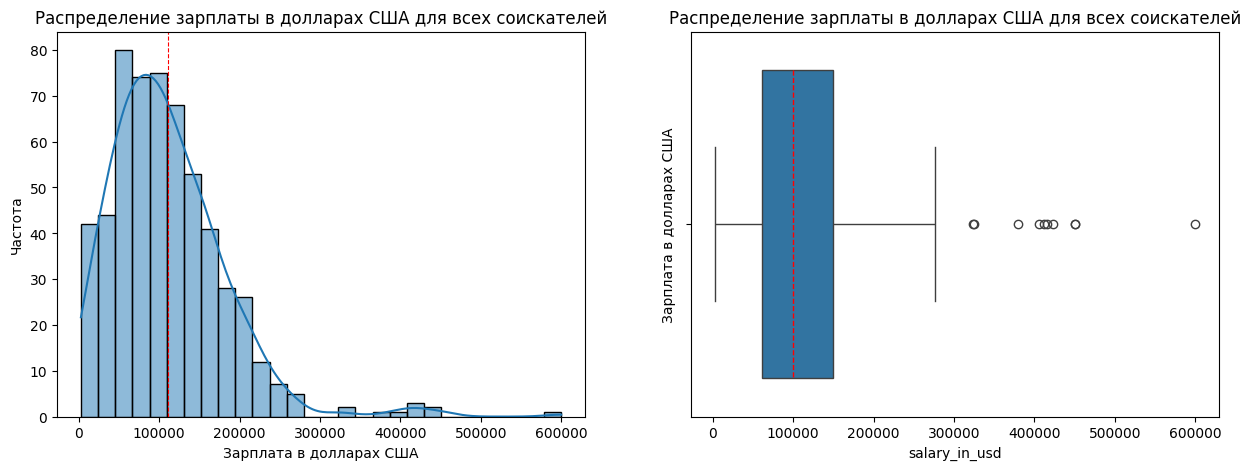

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# 
sns.histplot(ds["salary_in_usd"], kde=True, ax=axes[0])
axes[0].set(xlabel="Зарплата в долларах США", ylabel='Частота')
axes[0].set_title('Распределение зарплаты в долларах США для всех соискателей')
axes[0].axvline(ds['salary_in_usd'].mean(), color="red", linestyle='--', linewidth=0.8)

sns.boxplot(ds['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': "red", 'linestyle': '--'})
axes[1].set(ylabel="Зарплата в долларах США")
axes[1].set_title('Распределение зарплаты в долларах США для всех соискателей')
plt.show

Распределение зарплат отлично от нормального, имеются выбросы.

### Зарлатала в зависимости от уровня

Text(0.5, 1.0, 'Распределение зарплат от уровня')

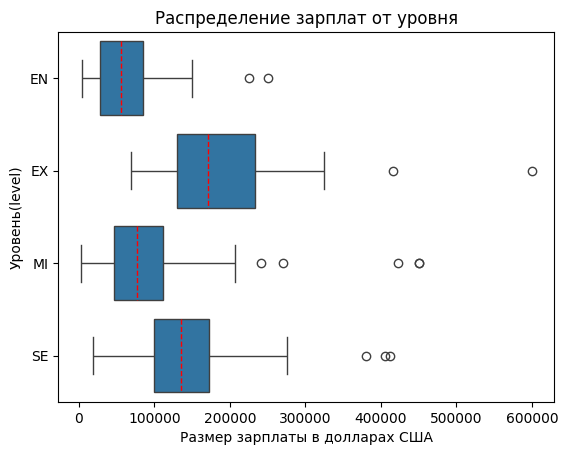

In [10]:
ax=sns.boxplot(ds, x='salary_in_usd', y='experience_level', orient='h', medianprops={'color': 'red', 'linestyle': '--'})
ax.set(xlabel='Размер зарплаты в долларах США', ylabel='Уровень(level)')
ax.set_title('Распределение зарплат от уровня')

In [11]:
ds_agg=ds.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от уровня')
ds_agg

Зарплата в зависимости от уровня


C:\Users\govor\AppData\Local\Temp\ipykernel_15844\1819756562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ds_agg=ds.groupby('experience_level')['salary_in_usd'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


На первый взгляд распределения зарплат для разного уровня различны. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

Text(0.5, 1.0, 'Соотношение зарплат Data Scientist и Data Engineer в 2022 году')

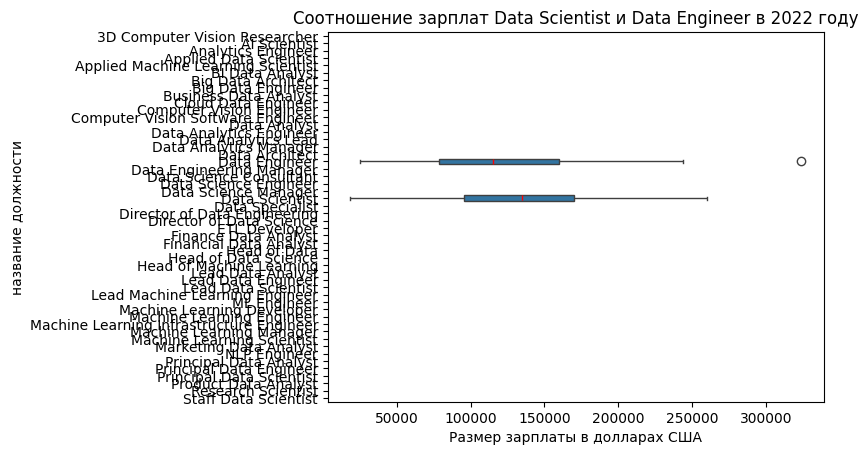

In [31]:
masc=((ds['job_title']=='Data Engineer') | (ds['job_title']=='Data Scientist')) & (ds['work_year']==2022)
ax=sns.boxplot(ds[masc], x='salary_in_usd', y='job_title', orient='h', medianprops={'color': 'red', 'linestyle': '--'})
ax.set(xlabel='Размер зарплаты в долларах США', ylabel='название должности')
ax.set_title('Соотношение зарплат Data Scientist и Data Engineer в 2022 году')

In [30]:
masc=((ds['job_title']=='Data Engineer') | (ds['job_title']=='Data Scientist')) & (ds['work_year']==2022)
ds_agg=ds[masc].groupby('job_title')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от уровня')
ds_agg

Зарплата в зависимости от уровня


C:\Users\govor\AppData\Local\Temp\ipykernel_15844\4120691741.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ds_agg=ds[masc].groupby('job_title')['salary_in_usd'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI Scientist,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Analytics Engineer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applied Data Scientist,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applied Machine Learning Scientist,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BI Data Analyst,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Big Data Architect,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Big Data Engineer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business Data Analyst,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По графику и таблице видно что зарплата в 2022 году у  Data Scientist выше чем у Data Engineer. 

Text(0.5, 1.0, 'Распределение зарплат от размера компании')

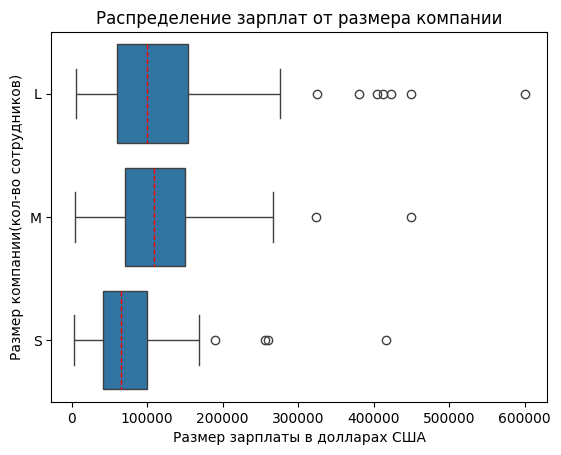

In [14]:
ax=sns.boxplot(ds, x='salary_in_usd', y='company_size', orient='h', medianprops={'color': 'red', 'linestyle': '--'})
ax.set(xlabel='Размер зарплаты в долларах США', ylabel='Размер компании(кол-во сотрудников)')
ax.set_title('Распределение зарплат от размера компании')

In [15]:
ds_agg=ds.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от размера компании')
ds_agg

Зарплата в зависимости от размера компании


C:\Users\govor\AppData\Local\Temp\ipykernel_15844\1705879340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ds_agg=ds.groupby('company_size')['salary_in_usd'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0
M,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0
S,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0


На первый взгляд распределения зарплат для разных размеров компании отличается. Так же можно заметить что М и L практиески идут нога в ногу. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

Text(0.5, 1.0, 'Распределение зарплат от формата работы')

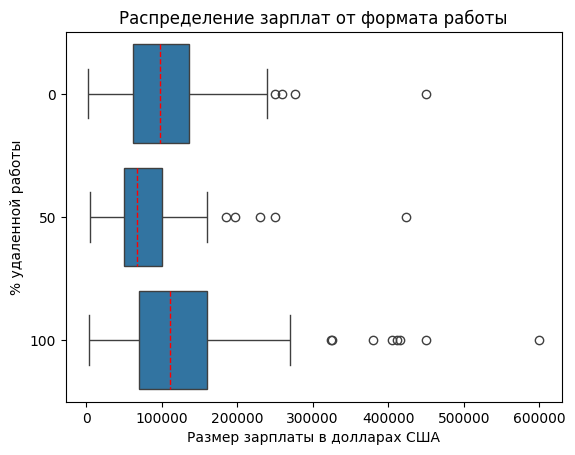

In [16]:
ax=sns.boxplot(ds, x='salary_in_usd', y='remote_ratio', orient='h', medianprops={'color': 'red', 'linestyle': '--'})
ax.set(xlabel='Размер зарплаты в долларах США', ylabel='% удаленной работы')
ax.set_title('Распределение зарплат от формата работы')

In [17]:
ds_agg=ds.groupby('remote_ratio')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от формата работы')
ds_agg

Зарплата в зависимости от формата работы


C:\Users\govor\AppData\Local\Temp\ipykernel_15844\2684801279.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ds_agg=ds.groupby('remote_ratio')['salary_in_usd'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,121.0,105785.40,68392.50,2859.0,62000.0,98158.0,136000.00,450000.0
50,98.0,80721.90,57639.10,5409.0,50000.5,68010.5,99925.75,423000.0
100,346.0,120763.19,74930.43,4000.0,70000.0,110712.5,159750.00,600000.0


На первый взгляд распределения зарплат для разного формата работы отличается. Так же можно заметить что тех кто работает полностью удаленного больше всего и зарплата выше. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

Text(0.5, 1.0, 'Распределение зарплат по годам')

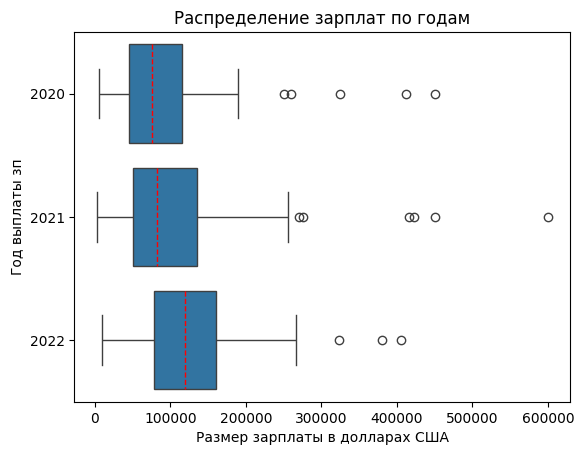

In [18]:
ax=sns.boxplot(ds, x='salary_in_usd', y='work_year', orient='h', medianprops={'color': 'red', 'linestyle': '--'})
ax.set(xlabel='Размер зарплаты в долларах США', ylabel='Год выплаты зп')
ax.set_title('Распределение зарплат по годам')

In [19]:
ds_agg=ds.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости года')
ds_agg

Зарплата в зависимости года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


In [20]:
ds.pivot_table(
    values='salary_in_usd',
    index='remote_ratio',
    columns='experience_level',
    fill_value=0
).round()

C:\Users\govor\AppData\Local\Temp\ipykernel_15844\2982952597.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ds.pivot_table(


experience_level,EN,EX,MI,SE
remote_ratio,,,,
0,57666.0,158949.0,83080.0,140591.0
50,60099.0,143175.0,76113.0,95251.0
100,63567.0,221748.0,94283.0,144722.0


По данной таблице можно увидеть, что средняя зарплата растет от уровня, а так же видно что удаленный формат работы оплачивается выше. 

In [21]:
ds.pivot_table(
    values='salary_in_usd',
    index='employment_type',
    columns='experience_level',
    fill_value=0
).round()

C:\Users\govor\AppData\Local\Temp\ipykernel_15844\883816740.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ds.pivot_table(


experience_level,EN,EX,MI,SE
employment_type,,,,
CT,65938.0,416000.0,270000.0,105000.0
FL,0.0,0.0,44000.0,60000.0
FT,64457.0,190728.0,88203.0,138839.0
PT,28657.0,0.0,43369.0,0.0


Исходя из таблицы выше, можно увидеть что больше всего платят специалистам по контракту, на втором месте полный рабочий день. 

Text(0.5, 1.0, 'Соотношение зарплат специалистов Data Scientist в компаниях различных размеров')

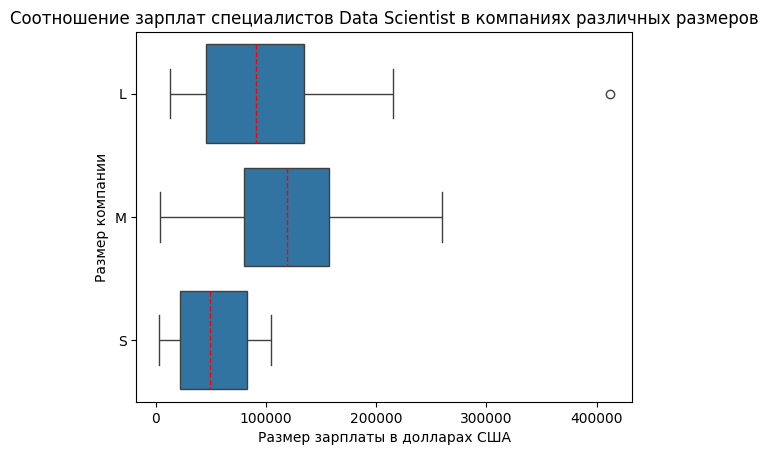

In [22]:
masc=ds['job_title']=='Data Scientist'
ax=sns.boxplot(ds[masc], x='salary_in_usd', y='company_size', orient='h', medianprops={'color': 'red', 'linestyle': '--'})
ax.set(xlabel='Размер зарплаты в долларах США', ylabel='Размер компании')
ax.set_title('Соотношение зарплат специалистов Data Scientist в компаниях различных размеров')

In [23]:
masc=ds['job_title']=='Data Scientist'
ds_agg=ds[masc].groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости года')
ds_agg

Зарплата в зависимости года


C:\Users\govor\AppData\Local\Temp\ipykernel_15844\2178184904.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ds_agg=ds[masc].groupby('company_size')['salary_in_usd'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


По графику и таблице видно, что Data Scientist больше ценятся в компаниях среднего уровня

Исходя из приведенных выше анализо, можно ответить на следующие вопросы:
- Растет ли зарплата из гоа в год? Заметно как средняя зарплата выросла к 2022 году. Не смотря на выборосы данных по предыдущим годам. 
- Как соотносится зарплата от размера компании? Видно, что у маленьких компаний зарплаты значительно ниже. Лидеры по зарплате оказались самые крупные компании, но и средние компании от них не сильно отстают. 
- Что влияет на зарплату? Уровень опыта и возможность работать самостоятельно в удаленном формате. 
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году? Зарплата Data Scientist была выше чем у Data Engineer
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров? По графику и таблице видно, что Data Scientist больше ценятся в компаниях среднего уровня

## Статистический анализ данных

In [24]:
# устанавливаем уровень занчимости 
alpha=0.05
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

###  Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер средней зарплаты за 2020 ($μ_1$) 2021 ($μ_2$) и 2022 ($μ_3$) не отличается.

 H_0 : μ_1 = μ_2 = μ_3

*Альтернативная гипотеза* ($H_1$): размер средней зарплаты за 2020 ($μ_1$) 2021 ($μ_2$) и 2022 ($μ_3$) отличается.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [26]:
# значение зарплат по годам
salary_2020=ds.loc[ds['work_year']==2020, 'salary_in_usd']
salary_2021=ds.loc[ds['work_year']==2021, 'salary_in_usd']
salary_2022=ds.loc[ds['work_year']==2022, 'salary_in_usd']

# проводим тест на нормальность шапиро
print("2020 год")
result=stats.shapiro(salary_2020)
decision_normality(result[1])

print("2021 год")
result=stats.shapiro(salary_2021)
decision_normality(result[1])

print("2022 год")
result=stats.shapiro(salary_2022)
decision_normality(result[1])

2020 год
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2021 год
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2022 год
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — 3.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.
Для проверки нашей гипотезы можно использовать КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

**Проведём тест**

In [27]:
_,p=stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**
У нас есть основание утверждать что зарплата из года в год растет

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер средней зарплаты Data Scientist в 2022 ($μ_1$) меньше или ровно средней зарплате Data Engineer 2022 ($μ_2$) 

 $$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер средней зарплаты Data Scientist в 2022 ($μ_1$) больше  средней зарплате Data Engineer 2022 ($μ_2$)
$$ H_1 : μ_1 > μ_2 $$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [28]:
# данные для теста
salary_Data_Scientist=ds.loc[ds['job_title']=='Data Scientist', 'salary_in_usd']
salary_Data_Engineer=ds.loc[ds['job_title']=='Data Engineer', 'salary_in_usd']
# проведем тест
print("для Data Scientist")
result=stats.shapiro(salary_Data_Scientist)
decision_normality(result[1])

print("для Data Engineer")
result=stats.shapiro(salary_Data_Engineer)
decision_normality(result[1])


для Data Scientist
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
для Data Engineer
p-value = 0.004
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — 2.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.
Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов

**Проведём тест**

In [29]:
# проводим тест

_,p=stats.mannwhitneyu(salary_Data_Scientist, salary_Data_Engineer, alternative='greater')
decision_hypothesis(p)

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## Вывод

Нет оснований утверждать, что зарплата Data Scientist была больше чем у Data Engineer в 2022г.